In [12]:
import graphviz
from sklearn.tree import export_graphviz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Charger le modèle à partir du fichier H5
model = load_model('/kaggle/input/model3splits/ModelSjogren3splits.h5')

# Afficher les détails du modèle
model.summary()




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 502, 502, 32)      3904      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 251, 251, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 32)      50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 32)      50208     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 32)       0

In [3]:
x_test=np.load('/kaggle/input/bootstrap-data/x_test(2).npy')
y_test=np.load('/kaggle/input/bootstrap-data/y_test(2).npy')

# tree_decision

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prétraiter les données de test avec le modèle CNN
X_test_processed = model.predict(x_test)
X_test_processed = np.reshape(X_test_processed, (x_test.shape[0], -1))

# Créer un modèle d'arbre de décision
dt_model = DecisionTreeClassifier()

# Entraîner le modèle sur les données de test prétraitées
dt_model.fit(X_test_processed, y_test)

# Obtenir l'arbre de décision entraîné
tree_model = dt_model.tree_


23/23 [==============================] - 1s 49ms/step


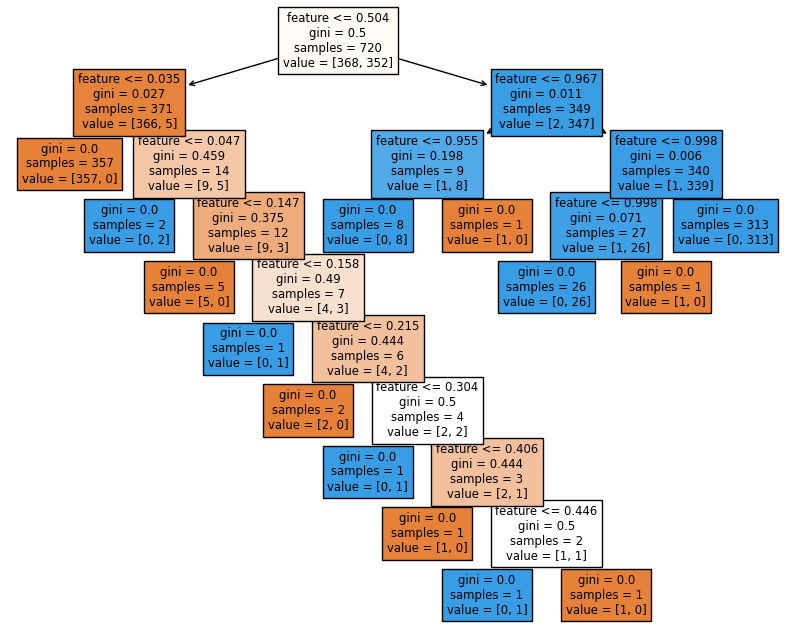

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Afficher l'arbre de décision
plt.figure(figsize=(10, 8))
plot_tree(dt_model, feature_names=['feature'], filled=True)
plt.show() 

# Cartes d'activation

1/1 [==============================] - 0s 40ms/step


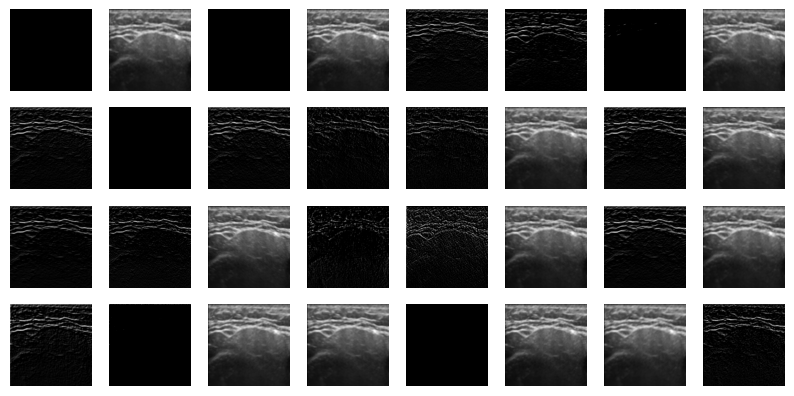

In [37]:
from tensorflow.keras.models import Model

activation_model = Model(inputs=model.input, outputs=model.layers[0].output)
activations = activation_model.predict(x_test[1].reshape(1, 512,512, 1))

plt.figure(figsize=(10, 10))
for i in range(activations.shape[3]):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()